In [110]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

digits = load_digits()

X,Y = digits.data, digits.target
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)
scaling = MinMaxScaler(feature_range=(-1, 1)).fit(X_train)
X_train = scaling.transform(X_train)
X_test = scaling.transform(X_test)

In [111]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn import metrics

linear_svm = SVC(kernel='linear')
linear_svm.fit(X_train, Y_train)
Y_pred = linear_svm.predict(X_test)
print("accuracy:", metrics.accuracy_score(y_true=Y_test, y_pred=Y_pred), "\n")

accuracy: 0.9740740740740741 



Text(0.5, 1.0, 'Decision surface of Logisitic Regressio')

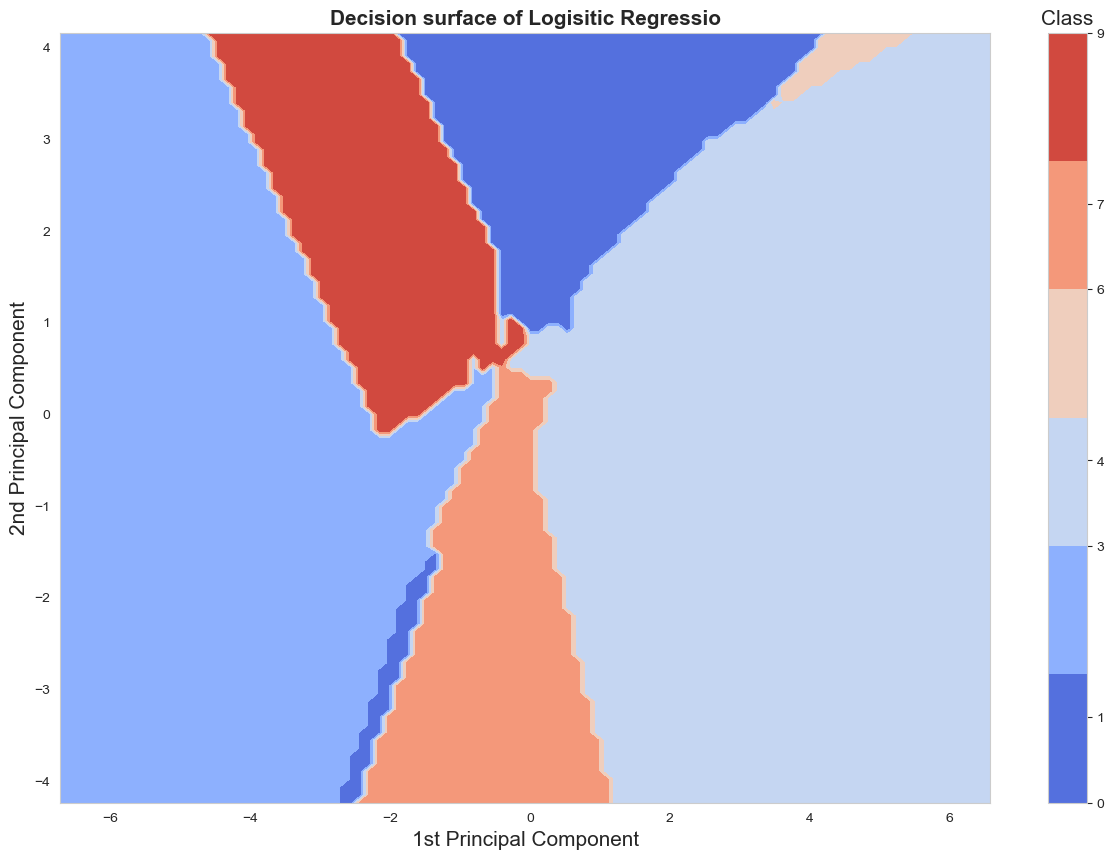

In [118]:
import seaborn as sns

# Initialize PCA object
pca = PCA(n_components=2)

# Fit PCA to normalized data with no components
Z = pca.fit_transform(X_train)

# Principal Components
V = pca.components_

# First and second PC
Z_x = Z[0]
Z_y = Z[1]

# Standard deviations of both components
std_x = np.std(Z_x)
std_y = np.std(Z_y)

# Grid parameters
x_min, x_max = -5*std_x, 5*std_x
y_min, y_max = -5*std_y, 5*std_y
x_step = std_x/10
y_step = std_y/10

# Create grid
xx, yy = np.meshgrid(np.arange(x_min, x_max, x_step), np.arange(y_min, y_max, y_step))

# Projected points into PC plane
z = np.c_[xx.ravel(), yy.ravel()]

# Revert projection
x = np.dot(z,V)

# Make prediction
Linear_svm = linear_svm
predictions = Linear_svm.predict(x)

predictions = predictions.reshape(xx.shape)



# Plot decision boundaries
sns.set_style("whitegrid")
plt.figure(figsize = (15,10))
contour = plt.contourf(xx, yy, predictions, cmap=plt.cm.coolwarm)
clb = plt.colorbar(contour, boundaries=list(np.unique(predictions)),
                        ticks=list(np.unique(predictions)),spacing='proportional')
clb.ax.set_title('Class', fontsize=15)
plt.xlabel('1st Principal Component', fontsize = 15)
plt.ylabel('2nd Principal Component', fontsize = 15)
plt.title("Decision surface of Logisitic Regressio", fontweight = 'bold', fontsize=15)



In [119]:
nonlinear_svm = SVC(kernel='rbf')
nonlinear_svm.fit(X_train, Y_train)
Y_pred = nonlinear_svm.predict(X_test)
print("accuracy:", metrics.accuracy_score(y_true=Y_test, y_pred=Y_pred), "\n")

accuracy: 0.987037037037037 



In [122]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

folds = KFold(n_splits = 5, shuffle = True, random_state = 10)
hyperparams = [ {'gamma': [1e-2, 1e-3, 1e-4], 'C': [5,10,15,20]}]

nonlinear_svm_cv = GridSearchCV(estimator = SVC(kernel="rbf"), 
                        param_grid = hyperparams, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      
nonlinear_svm_cv.fit(X_train, Y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=10, shuffle=True),
             estimator=SVC(),
             param_grid=[{'C': [5, 10, 15, 20],
                          'gamma': [0.01, 0.001, 0.0001]}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [132]:
import pandas as pd
cv_results = pd.DataFrame(nonlinear_svm_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.060159,0.003391,0.045386,0.002953,5,0.01,"{'C': 5, 'gamma': 0.01}",0.984127,0.988095,0.988048,...,0.984086,0.004373,3,0.997015,0.997015,0.995030,0.997018,0.998012,0.996818,0.000974
1,0.091870,0.011533,0.072341,0.003604,5,0.001,"{'C': 5, 'gamma': 0.001}",0.956349,0.948413,0.972112,...,0.953064,0.012940,8,0.969154,0.968159,0.962227,0.966203,0.968191,0.966787,0.002474
2,0.240354,0.013333,0.099092,0.006577,5,0.0001,"{'C': 5, 'gamma': 0.0001}",0.773810,0.746032,0.745020,...,0.757355,0.014731,12,0.795025,0.762189,0.787276,0.780318,0.812127,0.787387,0.016464
3,0.055768,0.005436,0.040453,0.001405,10,0.01,"{'C': 10, 'gamma': 0.01}",0.984127,0.988095,0.988048,...,0.984883,0.002988,1,0.998010,0.998010,0.996024,0.998012,0.999006,0.997812,0.000974
4,0.073385,0.002720,0.063922,0.002720,10,0.001,"{'C': 10, 'gamma': 0.001}",0.964286,0.976190,0.984064,...,0.967378,0.011388,7,0.980100,0.981095,0.977137,0.984095,0.980119,0.980509,0.002231
5,0.209406,0.030923,0.105523,0.006993,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.920635,0.904762,0.920319,...,0.911693,0.009564,11,0.925373,0.916418,0.917495,0.921471,0.920477,0.920247,0.003164
6,0.060358,0.004433,0.046445,0.010788,15,0.01,"{'C': 15, 'gamma': 0.01}",0.984127,0.984127,0.988048,...,0.984089,0.002520,2,0.999005,1.000000,0.999006,0.999006,1.000000,0.999403,0.000487
7,0.117323,0.085343,0.080729,0.024331,15,0.001,"{'C': 15, 'gamma': 0.001}",0.972222,0.988095,0.988048,...,0.973737,0.012506,6,0.988060,0.985075,0.979125,0.987078,0.985089,0.984885,0.003103
8,0.195798,0.063975,0.122473,0.039149,15,0.0001,"{'C': 15, 'gamma': 0.0001}",0.924603,0.920635,0.952191,...,0.930801,0.012157,10,0.938308,0.938308,0.931412,0.936382,0.940358,0.936954,0.003043
9,0.082470,0.011023,0.052065,0.005016,20,0.01,"{'C': 20, 'gamma': 0.01}",0.980159,0.980159,0.988048,...,0.982502,0.003164,4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


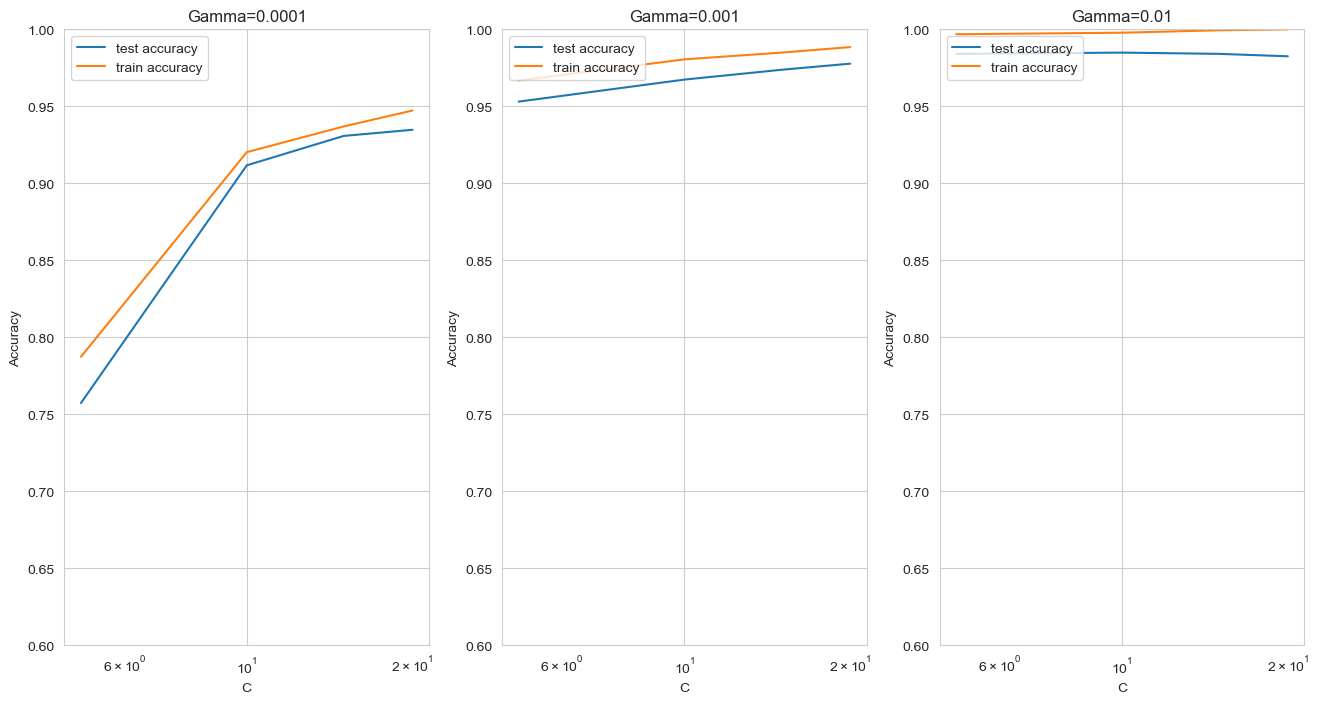

In [133]:
import matplotlib.pyplot as plt
cv_results['param_C'] = cv_results['param_C'].astype('int')

plt.figure(figsize=(16,8))

# subplot 1/3
plt.subplot(1,3,1)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 2/3
plt.subplot(1,3,2)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 3/3
plt.subplot(1,3,3)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


In [142]:
best_nonlinear_model = SVC(C=10, gamma=0.01, kernel="rbf")

best_nonlinear_model.fit(X_train, Y_train)
Y_pred = best_nonlinear_model.predict(X_test)
print("accuracy:", metrics.accuracy_score(y_true=Y_test, y_pred=Y_pred), "\n")


accuracy: 0.9944444444444445 



In [143]:
best_nonlinear_model = SVC(C=10, gamma=0.01, kernel="rbf")
best_nonlinear_model.fit(X_train, Y_train)
Y_pred = best_nonlinear_model.predict(x)
Y_pred = Y_pred.reshape(xx.shape)
print("accuracy:", metrics.accuracy_score(y_true=Y_test, y_pred=Y_pred), "\n")

# Plot decision boundaries
sns.set_style("whitegrid")
plt.figure(figsize = (15,10))
contour = plt.contourf(xx, yy, predictions, cmap=plt.cm.coolwarm)
clb = plt.colorbar(contour, boundaries=list(np.unique(predictions)),
                        ticks=list(np.unique(predictions)),spacing='proportional')
clb.ax.set_title('Class', fontsize=15)
plt.xlabel('1st Principal Component', fontsize = 15)
plt.ylabel('2nd Principal Component', fontsize = 15)
plt.title("Decision surface of Logisitic Regressio", fontweight = 'bold', fontsize=15)


ValueError: Found input variables with inconsistent numbers of samples: [540, 100]

Text(0.5, 1.0, 'Decision surface of Logisitic Regressio')

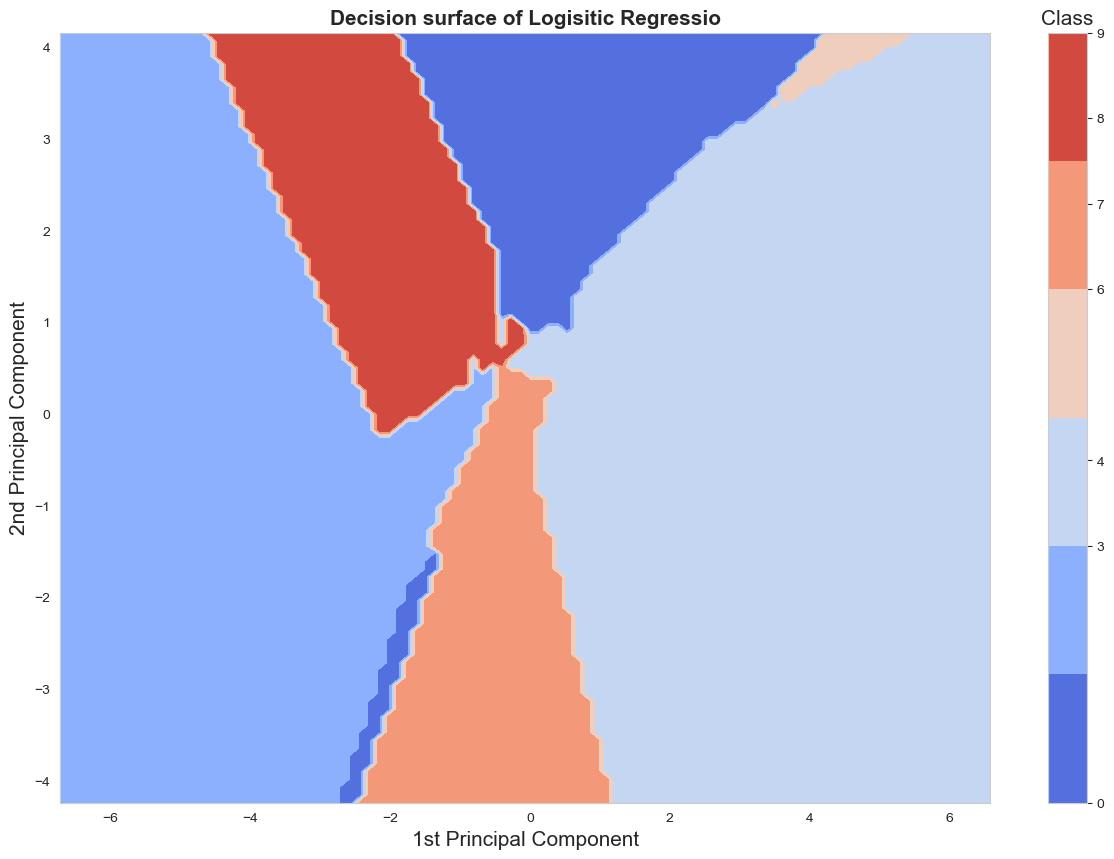

In [144]:
second_nonlinear_model = SVC(C=5, gamma=0.001, kernel="rbf")
second_nonlinear_model.fit(X_train, Y_train)
Y_pred = second_nonlinear_model.predict(x)
Y_pred = Y_pred.reshape(xx.shape)

# Plot decision boundaries
sns.set_style("whitegrid")
plt.figure(figsize = (15,10))
contour = plt.contourf(xx, yy, predictions, cmap=plt.cm.coolwarm)
clb = plt.colorbar(contour, boundaries=list(np.unique(Y_pred)),
                        ticks=list(np.unique(Y_pred)),spacing='proportional')
clb.ax.set_title('Class', fontsize=15)
plt.xlabel('1st Principal Component', fontsize = 15)
plt.ylabel('2nd Principal Component', fontsize = 15)
plt.title("Decision surface of Logisitic Regressio", fontweight = 'bold', fontsize=15)

C:\ProgramData\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Text(0.5, 1.0, 'Decision surface of Logisitic Regressio')

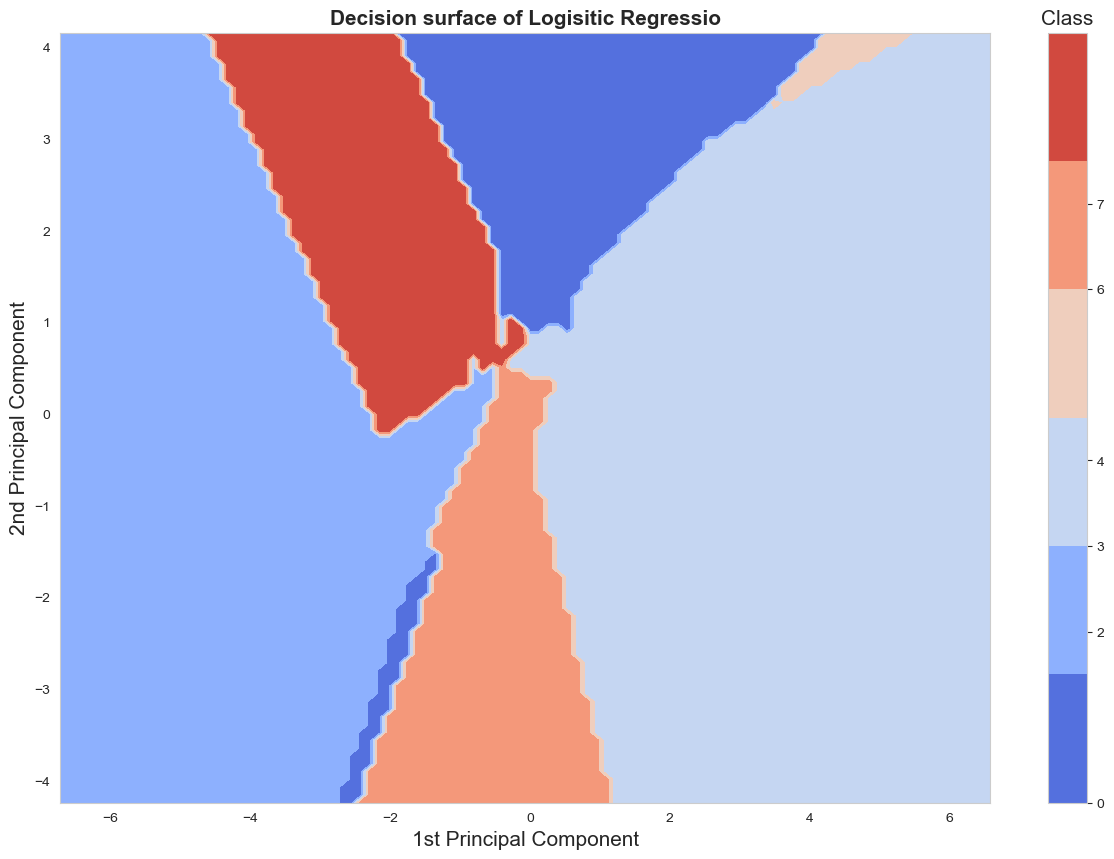

In [137]:
from sklearn.linear_model import LogisticRegression

LR_model = LogisticRegression()
LR_model.fit(X_train, Y_train)
Y_pred = LR_model.predict(x)
Y_pred = Y_pred.reshape(xx.shape)

# Plot decision boundaries
sns.set_style("whitegrid")
plt.figure(figsize = (15,10))
contour = plt.contourf(xx, yy, predictions, cmap=plt.cm.coolwarm)
clb = plt.colorbar(contour, boundaries=list(np.unique(Y_pred)),
                        ticks=list(np.unique(Y_pred)),spacing='proportional')
clb.ax.set_title('Class', fontsize=15)
plt.xlabel('1st Principal Component', fontsize = 15)
plt.ylabel('2nd Principal Component', fontsize = 15)
plt.title("Decision surface of Logisitic Regressio", fontweight = 'bold', fontsize=15)